In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.downtoearth.org.in/library/large/2020-03-01/0.01792700_1583044755_coronavirus-illustration-carousel.jpg")

# COVID-19 Global Outlook: Sentiment analysis 

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome. The first disease was identified in Dicember 2019 in Wuhan. On March 11 2020, after 118,000 people being infected in 114 Countries, and causing the death of 4,291 people, COVID-19 has been recognized as a pandemic. Today, April 13,2020, the pandemic infected 1,854,464 people in 185 countries, causing the death of 114,331 people.

In the context of the global COVID-19 pandemic, we follow the suggestions from Kaggle's competitions in order to provide useful insights about the virus' spread. Starting from a global exploratory analysis, then we focus on virus' modelling and prediction for the countries with the largest number of confirmed cases. For modelling, we implement SIR Model with some extensions and, for prediction, logistic and Gompertz model. At the end, we choose the best model based on $R^{2}$ score, check the predictions' numbers about confirmed and fatalities for the next time interval and display some results from NLTK Sentiment analysis. 

Data: [CBC News Coronavirus/COVID-19 Articles (NLP)](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26) 

**TABLE OF CONTENTS**
    
4. [NLTK Sentiment Analysis](#section4)

    4.1. [Evolution of news](#section41)
    
      4.1.1. [January](#section411)
      
      4.1.2. [February](#section412)
      
      4.1.3. [March](#section413)
      
    4.2. [Results](#section42)

# **4. NLTK Sentiment Analysis** <a id="section4"></a>

The process of analyzing natural language and making sense out of it falls under the field of Natural Language Processing (NLP). Sentiment analysis is a common NLP task, which involves classifying texts or parts of texts into a pre-defined sentiment. We used the Natural Language Toolkit (NLTK), a commonly used NLP library in Python, to analyze textual data.

Has the news media been overreacting or under-reacting during the development of COVID-19? What are the media's main focuses? How is the news correlated to public reactions or policy changes? We might find many insights with more than 3,500 CBC news articles.

The dataset contains the authors, the title, the publish date, the description about the story, the main story, and the url of CBC news articles from 2020-01-08 to 2020-03-27 about "coronavirus". This notebook presents a sentiment analysis of verified news to understand peoples’ reaction psychologically, politically and economically.

In [2]:
from IPython import display
import pandas as pd
import math
from pprint import pprint
import nltk
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
import os 
os.chdir("/Users/barbaratarantino/Desktop")

## 4.1 Evolution of news <a id="section41"></a>

We decide to split the sentiment analysis on the basis of the publish_date of the articles in order to understand how the main focus of CBC news articles has evolved during this COVID -19 affected time period.

We decided to proceed in this way:

* First of all, for each month we show the most relevant news from the European Center for Disease Prevention and Control site, so as to have an idea on the result of our analysis

* Then, using a barplot, we shows the number of positive and negative articles analyzed from our dataset

* Finally, we use the wordcloud to plot positive, negative words.


European Center for Disease Prevention and Control page: [Event background COVID-19](https://www.ecdc.europa.eu/en/novel-coronavirus/event-background-2019)

### 4.1.1. January <a id="section411"></a>

On **31 December 2019**, the Wuhan Municipal Health Commission in Wuhan City, Hubei province, China, reported a cluster of 27 pneumonia cases (including seven severe cases) of unknown aetiology, with a common reported link to Wuhan's Huanan Seafood Wholesale Market, a wholesale fish and live animal market. Cases showed symptoms such as fever, dry cough, dyspnoea.

On **9 January 2020**, the China CDC reported that a novel coronavirus (later named SARS-CoV-2, the virus causing COVID-19) had been detected as the causative agent for 15 of the 59 cases of pneumonia. 

On **10 January 2020**, the first novel coronavirus genome sequence was made publicly available. 

By **20 January 2020**, there were reports of confirmed cases from three countries outside China: Thailand, Japan and South Korea. These cases had all been exported from China.

On **23 January 2020**, Wuhan City was locked down – with all travel in and out of Wuhan prohibited – and movement inside the city was restricted.

On **24 January 2020**, there was the first European case in France. This case had a travel history to China. In Germany, cases were reported on 28 January, related to a person visiting from China.

On **30 January 2020**, the World Health Organization (WHO) declared this first outbreak of novel coronavirus a ‘public health emergency of international concern’. During the following weeks, several countries implemented entry screening measures for arriving passengers from China. 

In [4]:
news = pd.read_excel("news_jan.xlsx")
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,830,['Bridget Yard Is A Video Journalist Based In ...,Coronavirus anxiety leaves Sask. with surgical...,2020-01-31 22:26:00,Saskatoon and Regina drugstores are trying to ...,Saskatoon and Regina drugstores have sold out ...,https://www.cbc.ca/news/canada/saskatoon/surgi...
1,854,['Cbc News'],No cases of coronavirus in London: MLHU,2020-01-28 21:30:00,There are currently no confirmed or suspected ...,The top doctor for the London region is assuri...,https://www.cbc.ca/news/canada/london/coronavi...
2,859,[],Local retailers feeling impact of coronavirus ...,2020-01-31 22:16:00,Retailers in the National Capital Region say t...,"Rosanne Tremblay, owner of VSP Sports, points ...",https://www.cbc.ca/news/canada/ottawa/coronavi...
3,916,['Cbc News'],Officials testing Ottawa case for coronavirus,2020-01-29 23:08:00,The testing for the first suspected local case...,The testing for the first suspected local case...,https://www.cbc.ca/news/canada/ottawa/local-co...
4,989,[],Clock ticks on containing novel coronavirus,2020-01-28 19:01:00,There are two key unanswered questions surroun...,There are two key unanswered questions surroun...,https://www.cbc.ca/news/health/coronavirus-con...


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Maximum Number of Articles Written by Top 5 Authors')]

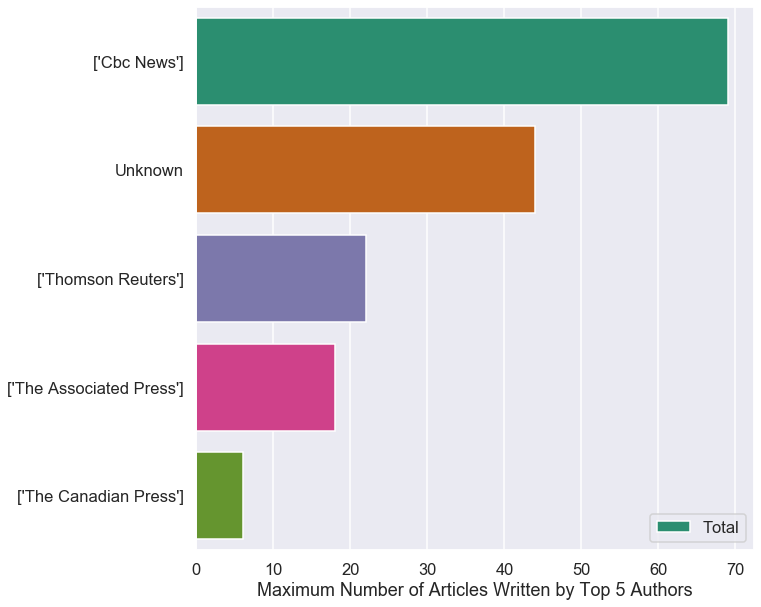

In [5]:
news.authors.replace("[]" , "Unknown"  ,inplace = True)

import matplotlib.pyplot as plt
authors = news.authors.value_counts().index.values[:5]
freq = news.authors.value_counts().values[:5]
authors_pd = pd.DataFrame(columns = ['authors' , 'freq'])
authors_pd['authors'] = authors
authors_pd['freq'] = freq

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = "freq" , y = "authors" , data = authors_pd , label = 'Total')
sns.set_color_codes("muted")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Maximum Number of Articles Written by Top 5 Authors")

In [6]:
text = news.text

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in text:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.9263,
  'neg': 0.075,
  'neu': 0.832,
  'pos': 0.093,
  'text': 'Saskatoon and Regina drugstores have sold out of surgical masks ‚Äî often used by¬†flu '
          'sufferers, people with pulmonary issues¬†and now by those worried about coronavirus. '
          '"All I had was five boxes I was able to order last week. I got those yesterday and had '
          'one person who came in yesterday and got all five boxes," said Parth Patel, the owner '
          'of Victoria Park Pharmacy in Regina. Michael Zaplitny, who is vulnerable to infection '
          'because of a recently diagnosed pulmonary condition,¬†visited three Regina pharmacies '
          'trying to find masks. "I discussed it with my wife who then jumped online to see what '
          'the possibilities were, and she found suppliers that you could order [from]," he said. '
          '"They were expected for delivery in about 10 days, so we actually ordered some online." '
          'Michael Zaplitny has a p

In [7]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,neg,neu,pos,text
0,0.9263,0.075,0.832,0.093,Saskatoon and Regina drugstores have sold out ...
1,-0.9436,0.085,0.867,0.047,The top doctor for the London region is assuri...
2,-0.9615,0.065,0.909,0.026,"Rosanne Tremblay, owner of VSP Sports, points ..."
3,-0.9908,0.132,0.855,0.013,The testing for the first suspected local case...
4,0.6079,0.050,0.899,0.051,There are two key unanswered questions surroun...


In [8]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,neg,neu,pos,text,label
0,0.9263,0.075,0.832,0.093,Saskatoon and Regina drugstores have sold out ...,1
1,-0.9436,0.085,0.867,0.047,The top doctor for the London region is assuri...,-1
2,-0.9615,0.065,0.909,0.026,"Rosanne Tremblay, owner of VSP Sports, points ...",-1
3,-0.9908,0.132,0.855,0.013,The testing for the first suspected local case...,-1
4,0.6079,0.050,0.899,0.051,There are two key unanswered questions surroun...,1


In [9]:
df2 = df[['text', 'label']]
df.label.value_counts()

-1    135
 1     40
 0      9
Name: label, dtype: int64

In [10]:
print("Positive news:\n")
pprint(list(df[df['label'] == 1].text)[:5], width=200)

print("\nNegative news:\n")
pprint(list(df[df['label'] == -1].text)[:5], width=200)

Positive news:

['Saskatoon and Regina drugstores have sold out of surgical masks ‚Äî often used by¬†flu sufferers, people with pulmonary issues¬†and now by those worried about coronavirus. "All I had was five '
 'boxes I was able to order last week. I got those yesterday and had one person who came in yesterday and got all five boxes," said Parth Patel, the owner of Victoria Park Pharmacy in Regina. '
 'Michael Zaplitny, who is vulnerable to infection because of a recently diagnosed pulmonary condition,¬†visited three Regina pharmacies trying to find masks. "I discussed it with my wife who then '
 'jumped online to see what the possibilities were, and she found suppliers that you could order [from]," he said. "They were expected for delivery in about 10 days, so we actually ordered some '
 'online." Michael Zaplitny has a pulmonary condition and worries about contracting the virus. He visited three pharmacies in Regina but couldn\'t find a surgical mask. (Radio-Canada) The situation '

In [11]:
df.label.value_counts(normalize=True) * 100

-1    73.369565
 1    21.739130
 0     4.891304
Name: label, dtype: float64

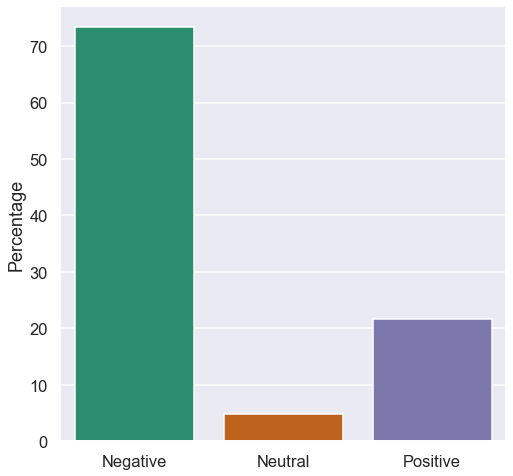

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

The barplot shows the number of positive and negative articles analysed from the news.

In [13]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [14]:
pos_lines = list(df[df.label == 1].text)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('said', 303),
 ('coronavirus', 276),
 ('health', 207),
 ('china', 169),
 ('people', 149),
 ('canada', 128),
 ('virus', 122),
 ('wuhan', 110),
 ('new', 101),
 ('public', 89),
 ('outbreak', 82),
 ('case', 81),
 ('äî', 76),
 ('one', 74),
 ('says', 72),
 ('officials', 70),
 ('toronto', 70),
 ('cases', 66),
 ('chinese', 65),
 ('spread', 64)]

Positive words


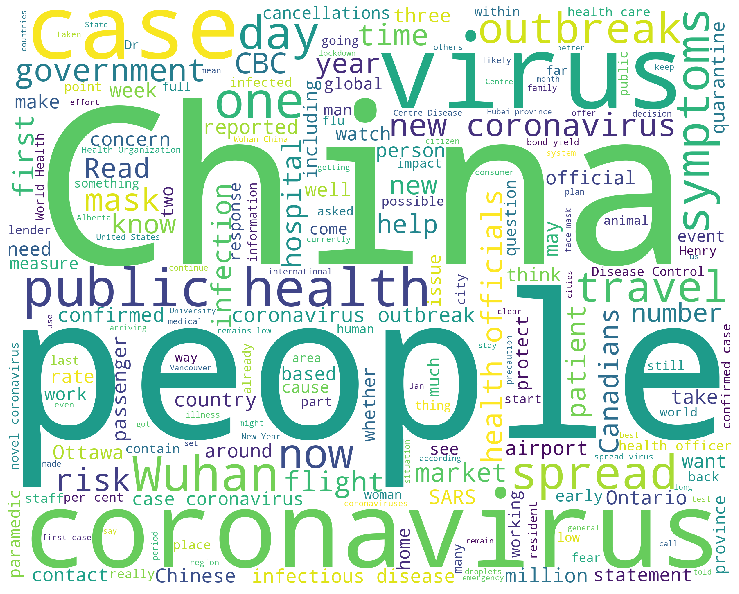

Negative words


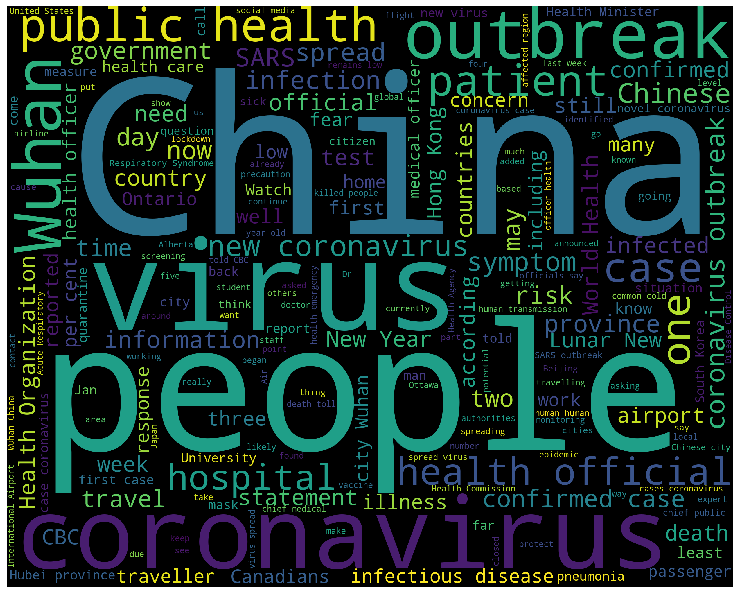

In [15]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(("good","morning","said","says","news", "will","monday","tuesday","wednesday","thursday","friday","saturday","sunday", "Äî", "Canada", "Toronto", "canada", "toronto", "Canadian", "canadian"))

df_pos = df[df.label == 1].text
df_neg = df[df.label == -1].text

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(df_pos,'white')
print("Negative words")
wordcloud_draw(df_neg)

### 4.1.2. February <a id="section412"></a>

On **4 February**, A large number of cases have been diagnosed on board the Diamond Princess, a cruise ship docked in the port of Yokohama, Japan. ; the ship was put in quarantine. In total, 696 cases were identified among the ship’s passengers. Of these cases, seven died.

On **22 February** , the Italian authorities reported clusters of cases in Lombardy and additional cases from two other regions, Piedmont and Veneto. Over the following days, cases were reported from several other regions. Transmission appears to have occurred locally, in contrast to first-generation transmission from people returning from affected areas. Transmission events were also reported from hospitals, with COVID-19 cases identified among healthcare workers and patients. During the following week, several European countries reported cases of COVID-19 in travellers from the affected areas in Italy, as well as cases without epidemiological links to Italy, China or other countries with ongoing transmission .

In [16]:
news = pd.read_excel("news_feb.xlsx")
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,469,['Cbc News'],Sask. updates coronavirus recommendations as s...,2020-02-27 16:00:00,"As coronavirus continues to spread elsewhere, ...",As the COVID-19 coronavirus continues to sprea...,https://www.cbc.ca/news/canada/saskatchewan/pr...
1,483,[],Ontario confirms 3 new positive cases of coron...,2020-02-29 19:58:00,Ontario has confirmed three new positive cases...,Ontario has confirmed three new positive cases...,https://www.cbc.ca/news/canada/toronto/ontario...
2,507,['The Associated Press'],Amazing Race suspends filming over coronavirus...,2020-02-28 22:41:00,CBS said in a statement Friday that it had tem...,The globe-trotting reality series The Amazing ...,https://www.cbc.ca/news/entertainment/amazing-...
3,530,['The Associated Press'],Brazil confirms 1st coronavirus case in Latin ...,2020-02-26 17:15:00,Brazil's government confirmed on Wednesday tha...,"The latest:¬† Read about cases in Italy, Iran...",https://www.cbc.ca/news/world/brazil-confirms-...
4,551,['Cbc News'],What you need to know now about coronavirus: 2...,2020-02-10 23:22:00,Stay up to date on the coronavirus outbreak an...,"The latest: Death toll in China passes 1,000 ...",https://www.cbc.ca/news/health/latest-on-coron...


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Maximum Number of Articles Written by Top 5 Authors')]

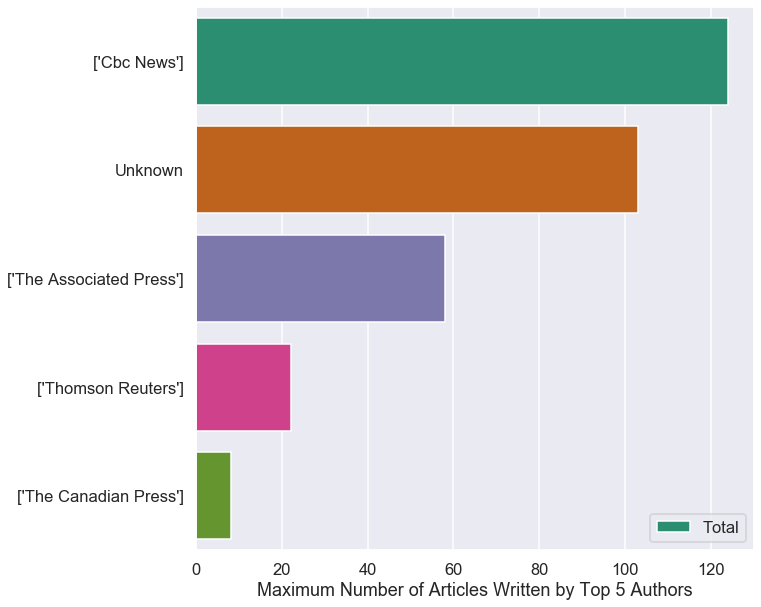

In [17]:
news.authors.replace("[]" , "Unknown"  ,inplace = True)

import matplotlib.pyplot as plt
authors = news.authors.value_counts().index.values[:5]
freq = news.authors.value_counts().values[:5]
authors_pd = pd.DataFrame(columns = ['authors' , 'freq'])
authors_pd['authors'] = authors
authors_pd['freq'] = freq

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = "freq" , y = "authors" , data = authors_pd , label = 'Total')
sns.set_color_codes("muted")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Maximum Number of Articles Written by Top 5 Authors")

In [18]:
text = news.text

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in text:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.9517,
  'neg': 0.092,
  'neu': 0.88,
  'pos': 0.028,
  'text': 'As the COVID-19 coronavirus continues to spread elsewhere, the government of '
          'Saskatchewan has added new recommendations in hopes of preventing an outbreak in the '
          "province. There still hasn't been a confirmed case in the province¬†and the risk to "
          "travellers is low, according to the province. COVID-19 outbreak: Here's what's "
          'happening around the world ThursdayCanada preparing a Plan B pandemic response in case '
          'coronavirus containment fails Still, Chief Medical Health Officer Dr. Saqib Shahab said '
          'anyone travelling to affected areas should pay close attention to their health for two '
          'weeks after travel. If you have travelled to Hubei in the last 14 days:  Self-isolate '
          'at home for 14 days after leaving the area. Actively monitor for symptoms of COVID-19 '
          'including cough, fever and difficulty breat

In [19]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,neg,neu,pos,text
0,-0.9517,0.092,0.880,0.028,As the COVID-19 coronavirus continues to sprea...
1,0.5650,0.042,0.913,0.045,Ontario has confirmed three new positive cases...
2,0.5423,0.034,0.919,0.047,The globe-trotting reality series The Amazing ...
3,-0.8519,0.050,0.923,0.027,"The latest:¬† Read about cases in Italy, Iran..."
4,-0.9964,0.102,0.856,0.042,"The latest: Death toll in China passes 1,000 ..."


In [20]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,neg,neu,pos,text,label
0,-0.9517,0.092,0.880,0.028,As the COVID-19 coronavirus continues to sprea...,-1
1,0.5650,0.042,0.913,0.045,Ontario has confirmed three new positive cases...,1
2,0.5423,0.034,0.919,0.047,The globe-trotting reality series The Amazing ...,1
3,-0.8519,0.050,0.923,0.027,"The latest:¬† Read about cases in Italy, Iran...",-1
4,-0.9964,0.102,0.856,0.042,"The latest: Death toll in China passes 1,000 ...",-1


In [21]:
df2 = df[['text', 'label']]
df.label.value_counts()

-1    208
 1    174
 0     16
Name: label, dtype: int64

In [22]:
print("Positive news:\n")
pprint(list(df[df['label'] == 1].text)[:5], width=200)

print("\nNegative news:\n")
pprint(list(df[df['label'] == -1].text)[:5], width=200)

Positive news:

['Ontario has confirmed three new positive cases of coronavirus, bringing the total number of confirmed cases¬†in the province to 11. The new cases involve a woman, 34, in York Region, and another '
 'woman, 51, and her husband, 69, in Durham region. Both women had just returned from Iran. York Region public health officials have begun a search for anyone who might have come in contact with one '
 'of the cases, either in the air or on a GO bus to Richmond Hill. As of Saturday, there were 20 confirmed coronavirus cases in Canada. The number includes¬†eight in B.C. and one in Quebec.¬†There '
 "have been no deaths. Dr. David Williams, Ontario's chief medical officer of health, said in a news release on Saturday that the first three cases of coronavirus found in Ontario¬†have been "
 "resolved, with each of those patients having had two consecutive negative tests at least 24 hours apart. B.C. health officials announce province's 8th case of coronavirus Of the cases announ

 'transmission on Jan. 3, the spread of the sickness to health-care workers on Jan. 7, and the initial COVID-19 death on Jan. 9.¬†¬† The Chinese public was also kept in the dark. Local papers in '
 "Wuhan reported sparingly on the illness in early January, mostly denying that it existed, or was in any way related to SARS. The People's Daily, the country's national newspaper, made no mention "
 'of the outbreak whatsoever until Jan. 21, the day President Xi Jinping finally acknowledged the problem, decreeing that the virus "must be taken seriously," in remarks reported by state '
 'television. Travellers are seen at the Shanghai Hongqiao Railway Station on Tuesday, what should have been the last day of the Spring Festival travel rush. (Aly Song/Reuters)¬† And the timeline of '
 'who knew what, when, keeps changing.¬† Last week, official Chinese media reported on a speech Xi gave at the beginning of February¬†in which the president claimed he had demanded measures to '
 '"prevent and con

In [23]:
df.label.value_counts(normalize=True) * 100

-1    52.261307
 1    43.718593
 0     4.020101
Name: label, dtype: float64

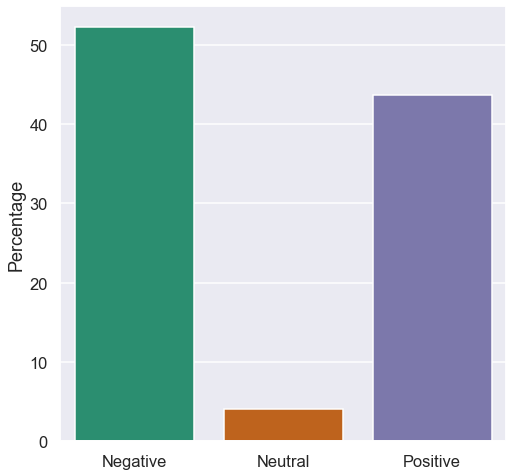

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [25]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [26]:
pos_lines = list(df[df.label == 1].text)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('said', 1559),
 ('coronavirus', 847),
 ('china', 770),
 ('health', 668),
 ('canada', 612),
 ('people', 516),
 ('quarantine', 437),
 ('ship', 432),
 ('passengers', 421),
 ('canadians', 390),
 ('canadian', 387),
 ('outbreak', 384),
 ('cruise', 376),
 ('virus', 354),
 ('cases', 351),
 ('wuhan', 330),
 ('äî', 326),
 ('two', 290),
 ('government', 283),
 ('public', 268)]

Positive words


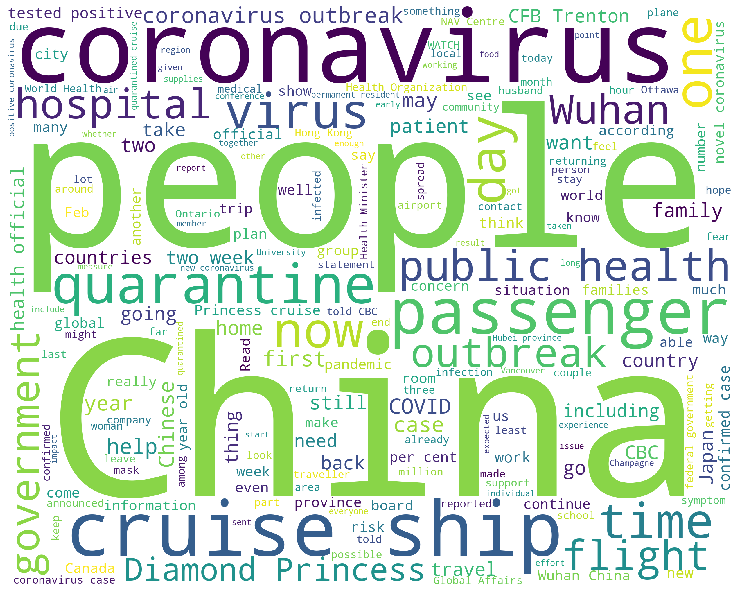

Negative words


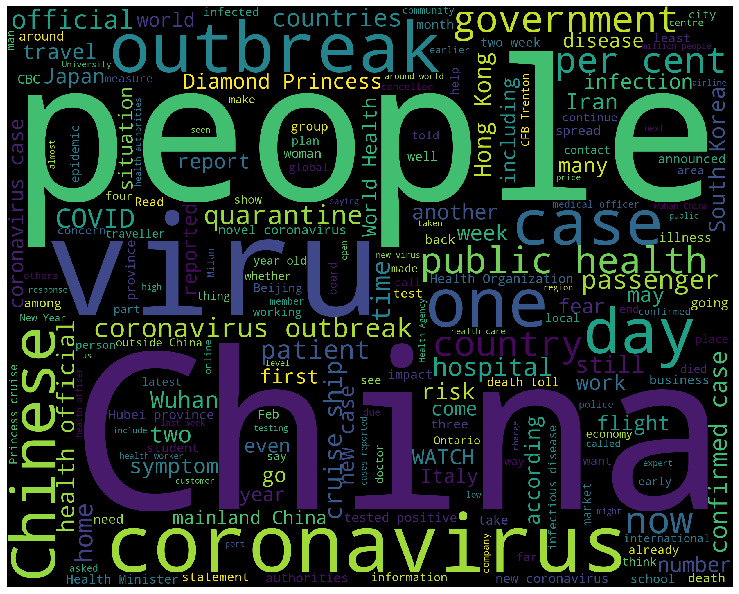

In [27]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(("good","morning","said","says","news", "will","monday","tuesday","wednesday","thursday","friday","saturday","sunday", "Äî", "Canada", "Toronto", "canada", "toronto", "Canadian", "canadian", "canadians", "Canadians"))

df_pos = df[df.label == 1].text
df_neg = df[df.label == -1].text

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(df_pos,'white')
print("Negative words")
wordcloud_draw(df_neg)

### 4.1.3. March <a id="section413"></a>

On **8 March 2020** , Italy issued a decree to install strict public health measures including social distancing starting first in the most affected regions and on 11 March 2020, extending these measures at national level. Following Italy, Spain, France and many other European countries installed similar public health measures.

On **11 March 2020**, the Director General of the World Health Organization declared COVID-19 a global pandemic.For the most recent information on the current situation regarding COVID-19, please visit this page.

As of **25 March 2020**, all EU/EEA countries and more than 150 countries worldwide are affected.

In [28]:
news = pd.read_excel("news_mar.xlsx")
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,¬† Trudeau says rules of Quarantine Act will...,https://www.cbc.ca/news/the-latest-on-the-coro...


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Maximum Number of Articles Written by Top 5 Authors')]

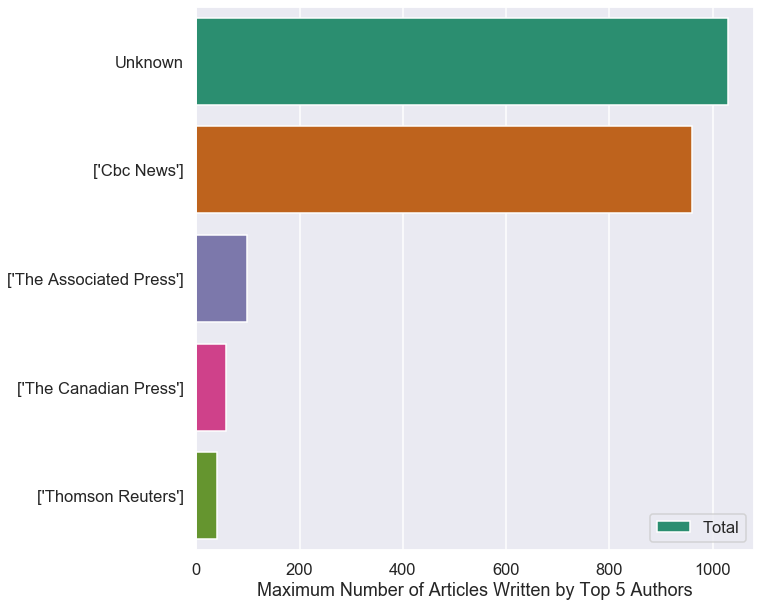

In [29]:
news.authors.replace("[]" , "Unknown"  ,inplace = True)

import matplotlib.pyplot as plt
authors = news.authors.value_counts().index.values[:5]
freq = news.authors.value_counts().values[:5]
authors_pd = pd.DataFrame(columns = ['authors' , 'freq'])
authors_pd['authors'] = authors
authors_pd['freq'] = freq

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = "freq" , y = "authors" , data = authors_pd , label = 'Total')
sns.set_color_codes("muted")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Maximum Number of Articles Written by Top 5 Authors")

In [30]:
text = news.text

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in text:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.3444,
  'neg': 0.059,
  'neu': 0.903,
  'pos': 0.038,
  'text': 'Canadian pharmacies are limiting how much medication can be dispensed to try to prevent '
          'shortages, recognizing that most active ingredients for drugs come from India and China '
          'and medical supply chains have been disrupted by the spread of COVID-19. Provincial '
          'regulatory colleges are complying with the Canadian Pharmacists Association call to '
          'limit the amount of medications given to patients to 30-day¬†supplies. The goal is to '
          "stop people from refilling prescriptions early and to ensure life-saving drugs don't "
          'run short when supply chains are¬†vulnerable. Mina Tadrous is a pharmacist and '
          'researcher in Toronto who monitors pharmaceutical supplies. He is worried Canadians '
          'will start stockpiling drugs after watching what has been unfolding in the U.S. and '
          'other regions as the virus spreads.¬† H

In [31]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,neg,neu,pos,text
0,-0.3444,0.059,0.903,0.038,Canadian pharmacies are limiting how much medi...
1,0.1027,0.047,0.914,0.039,The Yukon government has identified two places...
2,0.9893,0.072,0.819,0.108,The Senate late Wednesday passed an unparallel...
3,0.9928,0.061,0.815,0.124,Scientists around the world are racing to find...
4,0.9765,0.056,0.864,0.080,¬† Trudeau says rules of Quarantine Act will...


In [32]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,neg,neu,pos,text,label
0,-0.3444,0.059,0.903,0.038,Canadian pharmacies are limiting how much medi...,-1
1,0.1027,0.047,0.914,0.039,The Yukon government has identified two places...,0
2,0.9893,0.072,0.819,0.108,The Senate late Wednesday passed an unparallel...,1
3,0.9928,0.061,0.815,0.124,Scientists around the world are racing to find...,1
4,0.9765,0.056,0.864,0.080,¬† Trudeau says rules of Quarantine Act will...,1


In [33]:
df2 = df[['text', 'label']]
df.label.value_counts()

 1    1900
-1     942
 0     110
Name: label, dtype: int64

In [34]:
print("Positive news:\n")
pprint(list(df[df['label'] == 1].text)[:5], width=200)

print("\nNegative news:\n")
pprint(list(df[df['label'] == -1].text)[:5], width=200)

Positive news:

['The Senate late Wednesday passed an unparalleled $2.2 trillion US economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic. The '
 'unanimous vote came despite misgivings on both sides about whether it goes too far or not far enough and capped days of difficult negotiations as Washington confronted a national challenge unlike '
 'it has ever faced. The 880-page measure is the largest economic relief bill in U.S. history. Republican Senate Majority Leader Mitch McConnell¬†appeared sombre¬†and exhausted as he announced the '
 'vote ‚Äî and he released senators from Washington until April 20, though he promised to recall them if needed. "The legislation now before us now is historic because it is meant to match a '
 'historic crisis," said Democratic Senate Minority Leader Chuck Schumer. "Our health care system is not prepared to care for the sick. Our workers are without work. Our businesses cannot do '
 'b

In [35]:
df.label.value_counts(normalize=True) * 100

 1    64.363144
-1    31.910569
 0     3.726287
Name: label, dtype: float64

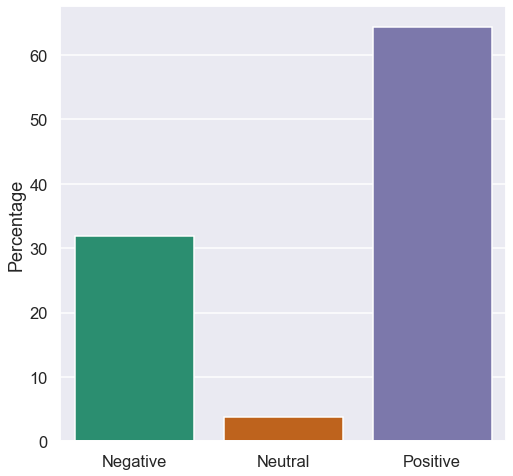

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [37]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [38]:
pos_lines = list(df[df.label == 1].text)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('said', 16317),
 ('19', 8969),
 ('covid', 8961),
 ('health', 7287),
 ('people', 6802),
 ('also', 3467),
 ('canada', 3155),
 ('public', 3133),
 ('home', 3121),
 ('cases', 3100),
 ('coronavirus', 3031),
 ('care', 2901),
 ('äî', 2769),
 ('government', 2720),
 ('province', 2643),
 ('says', 2641),
 ('new', 2616),
 ('one', 2583),
 ('cbc', 2429),
 ('time', 2363)]

Positive words


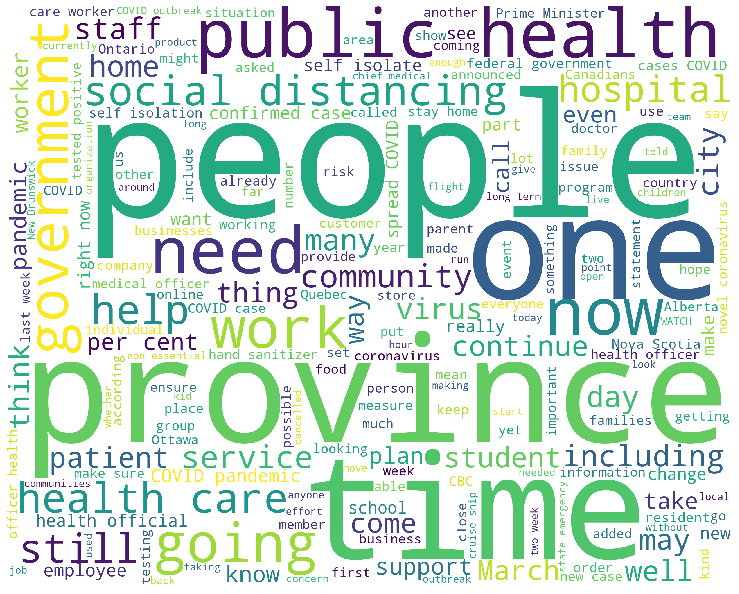

Negative words


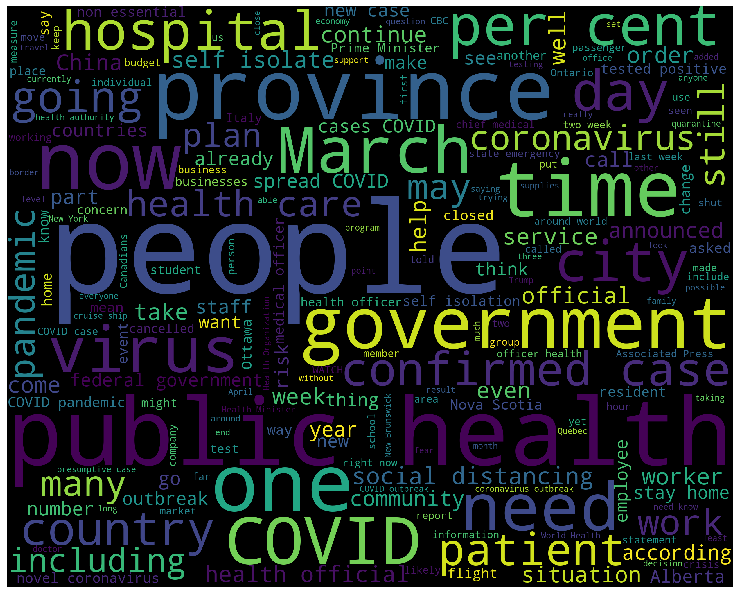

In [39]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(("good","morning","said","says","news", "will","monday","tuesday","wednesday","thursday","friday","saturday","sunday", "Äî", "Canada", "Toronto", "canada", "toronto", "Canadian", "canadian"))

df_pos = df[df.label == 1].text
df_neg = df[df.label == -1].text

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(df_pos,'white')
print("Negative words")
wordcloud_draw(df_neg)

## 4.2 Results <a id="section42"></a>

Through the use of web scraping and NLP (sentiment analysis), this analysis shows the media’s reaction to the current Coronavirus situation. 

Starting from **January**, we showed that on average, articles are 73% negative and only 22% positive in polarity. The first split of the analysis is focused on the first-wave of the pandemic, as showed in the worldcloud by the size of the word China. Focusing on **February**, we can see how the news are 43% positive in polarity, since this is the period in which scientists started to study coronavirus, symptoms and treatment. From the worldcloud we can point out the high frequency of news about Diamond Princess and China's lockdown. At the end, on the last month of the analysis (**March**), the positive news surpassed the negative ones in polarity and, from the worlcloud, we can notice how the main news' features are changed. If before we had China as one of the main words, now the focus is on the possible national responses to coronavirus, as evidenced by words like government, social distancing, self isolate, healthcare, work, help and community. 

